<a href="https://colab.research.google.com/github/clyde2020/ML_Portfolio/blob/main/Kaggle_Histopathologic_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import shutil
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df = pd.read_csv('/content/gdrive/MyDrive/Histopath/train_labels.csv')

In [3]:
len(df.id)

220025

In [4]:
picdict = dict(zip(df['id'], df['label']))

In [5]:
os.mkdir('/content/Lymph')
os.mkdir('/content/Lymph/Noncancer')
os.mkdir('/content/Lymph/Cancer')

In [6]:
source_folder = '/content/gdrive/MyDrive/Histopath/small_set'
benign_folder = '/content/Lymph/Noncancer'
mal_folder = '/content/Lymph/Cancer'
train_folder = '/content/Lymph'
#SOURCE = "C://Users//marcu//Desktop//Datasets//Histopath//small_set"
#SOURCE = "/content/gdrive/MyDrive/Histopath/train"
new_list = os.listdir(source_folder)
len(new_list)

4344

In [7]:
for fname in new_list:
  origin = os.path.join(source_folder, fname)
  name = os.path.splitext(os.path.basename(fname))[0]
  if os.path.getsize(origin) > 1:
    if picdict[name] == 0:
      destination = os.path.join(benign_folder, fname)
      shutil.copy(origin, benign_folder)
    else:
      shutil.copy(origin, mal_folder)

In [8]:
print(len(os.listdir(benign_folder)))
print(len(os.listdir(mal_folder)))

2611
1733


In [9]:
train_datagen = ImageDataGenerator(rescale=1/255.0,
                                  rotation_range=45,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(96, 96),
    batch_size=10,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255.0)  

validation_generator = validation_datagen.flow_from_directory(
    train_folder,
    target_size=(96, 96),
    batch_size=10,
    class_mode='binary') 

Found 4344 images belonging to 2 classes.
Found 4344 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, input_shape=(96, 96, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(96, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
                          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 5))
#optimizer = tf.keras.optimizers.Adam(learning_rate=1e-7)
#model.compile(loss=tf.keras.losses.Huber(),
#              optimizer=optimizer,
#              metrics=["mae"])


model.compile(optimizer=RMSprop(learning_rate=1e-5), loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 96)       0

In [11]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              callbacks=[lr_schedule])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
435/435 [==============================] - 49s 41ms/step - loss: 0.6313 - acc: 0.6365 - lr: 1.0000e-05
Epoch 2/20
435/435 [==============================] - 18s 41ms/step - loss: 0.5550 - acc: 0.7380 - lr: 1.5849e-05
Epoch 3/20
435/435 [==============================] - 17s 40ms/step - loss: 0.5074 - acc: 0.7719 - lr: 2.5119e-05
Epoch 4/20
435/435 [==============================] - 18s 41ms/step - loss: 0.5043 - acc: 0.7634 - lr: 3.9811e-05
Epoch 5/20
435/435 [==============================] - 18s 41ms/step - loss: 0.5048 - acc: 0.7666 - lr: 6.3096e-05
Epoch 6/20
435/435 [==============================] - 18s 41ms/step - loss: 0.5092 - acc: 0.7645 - lr: 1.0000e-04
Epoch 7/20
435/435 [==============================] - 18s 41ms/step - loss: 0.5113 - acc: 0.7608 - lr: 1.5849e-04
Epoch 8/20
435/435 [==============================] - 18s 41ms/step - loss: 0.5266 - acc: 0.7606 - lr: 2.5119e-04
Epoch 9/20
435/435 [==============================] - 18s 41ms/step - loss: 0.5365 - acc

(1e-05, 0.1, 0.0, 1.0)

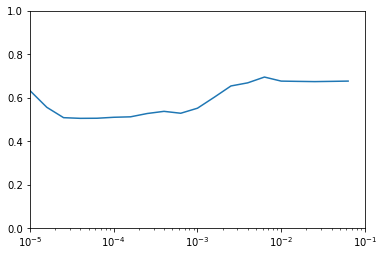

In [12]:


plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-5, 1e-1, 0, 1])

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, input_shape=(96, 96, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(96, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
                          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_generator,
                    epochs=20,
                    verbose=1)

Epoch 1/20
435/435 [==============================] - 19s 40ms/step - loss: 0.5700 - acc: 0.6954
Epoch 2/20
435/435 [==============================] - 17s 40ms/step - loss: 0.4956 - acc: 0.7756
Epoch 3/20
435/435 [==============================] - 17s 40ms/step - loss: 0.4858 - acc: 0.7813
Epoch 4/20
435/435 [==============================] - 17s 40ms/step - loss: 0.4834 - acc: 0.7799
Epoch 5/20
435/435 [==============================] - 17s 39ms/step - loss: 0.4795 - acc: 0.7806
Epoch 6/20
435/435 [==============================] - 17s 40ms/step - loss: 0.4764 - acc: 0.7841
Epoch 7/20
435/435 [==============================] - 17s 40ms/step - loss: 0.4762 - acc: 0.7852
Epoch 8/20
435/435 [==============================] - 17s 40ms/step - loss: 0.4669 - acc: 0.7898
Epoch 9/20
435/435 [==============================] - 17s 40ms/step - loss: 0.4664 - acc: 0.7891
Epoch 10/20
435/435 [==============================] - 17s 40ms/step - loss: 0.4668 - acc: 0.7933
Epoch 11/20
435/435 [========

Model with Adam optimizer

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, input_shape=(96, 96, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(96, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
                          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 5))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
#model.compile(loss=tf.keras.losses.Huber(),
#              optimizer=optimizer,
#              metrics=["mae"])


model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 22, 22, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 96)        55392     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 96)      

In [23]:
history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    callbacks=[lr_schedule])

Epoch 1/20
435/435 [==============================] - 18s 39ms/step - loss: 0.6447 - acc: 0.6103 - lr: 1.0000e-05
Epoch 2/20
435/435 [==============================] - 17s 39ms/step - loss: 0.5543 - acc: 0.7369 - lr: 1.5849e-05
Epoch 3/20
435/435 [==============================] - 17s 39ms/step - loss: 0.5004 - acc: 0.7620 - lr: 2.5119e-05
Epoch 4/20
435/435 [==============================] - 17s 39ms/step - loss: 0.4933 - acc: 0.7721 - lr: 3.9811e-05
Epoch 5/20
435/435 [==============================] - 17s 39ms/step - loss: 0.4985 - acc: 0.7668 - lr: 6.3096e-05
Epoch 6/20
435/435 [==============================] - 17s 38ms/step - loss: 0.4978 - acc: 0.7696 - lr: 1.0000e-04
Epoch 7/20
435/435 [==============================] - 17s 39ms/step - loss: 0.4989 - acc: 0.7707 - lr: 1.5849e-04
Epoch 8/20
435/435 [==============================] - 17s 39ms/step - loss: 0.4972 - acc: 0.7723 - lr: 2.5119e-04
Epoch 9/20
435/435 [==============================] - 17s 39ms/step - loss: 0.5107 - acc

(1e-05, 0.1, 0.0, 1.0)

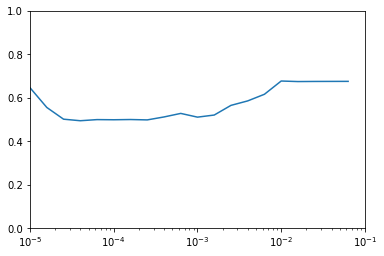

In [24]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-5, 1e-1, 0, 1])

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, input_shape=(96, 96, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(96, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
                          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(350, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_generator,
                    epochs=20,
                    verbose=1)

Epoch 1/20
435/435 [==============================] - 18s 40ms/step - loss: 0.5465 - acc: 0.7171
Epoch 2/20
435/435 [==============================] - 17s 40ms/step - loss: 0.4979 - acc: 0.7716
Epoch 3/20
435/435 [==============================] - 17s 39ms/step - loss: 0.4793 - acc: 0.7820
Epoch 4/20
435/435 [==============================] - 17s 39ms/step - loss: 0.4817 - acc: 0.7795
Epoch 5/20
435/435 [==============================] - 17s 39ms/step - loss: 0.4741 - acc: 0.7896
Epoch 6/20
435/435 [==============================] - 17s 39ms/step - loss: 0.4666 - acc: 0.7910
Epoch 7/20
435/435 [==============================] - 17s 40ms/step - loss: 0.4688 - acc: 0.7901
Epoch 8/20
435/435 [==============================] - 17s 40ms/step - loss: 0.4731 - acc: 0.7813
Epoch 9/20
435/435 [==============================] - 17s 39ms/step - loss: 0.4650 - acc: 0.7898
Epoch 10/20
435/435 [==============================] - 17s 40ms/step - loss: 0.4562 - acc: 0.7972
Epoch 11/20
435/435 [========